In [1]:
import numpy as np;import pandas as pd

housing=pd.read_csv(r'C:\Users\SONY\Desktop\NumPy\housing.data.txt',sep='\s+')
housing.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRAIO','B','LSTAT','MEDV']
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRAIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [2]:
X=housing.iloc[:,:-1].values
y=housing['MEDV'].values


In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3)



In [4]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)



Text(0, 0.5, 'Residuo')

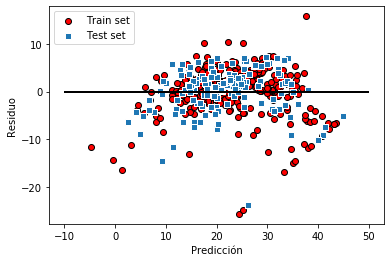

In [5]:
import matplotlib.pyplot as plt

plt.scatter(y_pred_train,y_pred_train-y_train,marker='o',c='red',edgecolors='black',label='Train set')
plt.scatter(y_pred_test,y_pred_test-y_test,marker='s',edgecolors='white',label='Test set')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.legend()
plt.xlabel('Predicción');plt.ylabel('Residuo')


##### Como se puede ver de la grafica anterior se presenta gran cantidad de outliers (puntos muy alejados de la linea central), además se observa ligeros patrones en la distribución de los puntos (no están aleatoriamente distribuidos en el plano) insunuando que el modelo falla en captar cierta información sobre las variables independientes.

# Medidas Cuantitativas del rendimiento del modelo

In [7]:
from sklearn.metrics import mean_squared_error

print(f'MSE train: {mean_squared_error(y_train,y_pred_train)}, test: {mean_squared_error(y_test,y_pred_test)}')

MSE train: 22.38986977437944, test: 21.381584395807142


In [10]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' %
(r2_score(y_train, y_pred_train),
r2_score(y_test, y_pred_test)))


R^2 train: 0.741, test: 0.728


##### Considerando que el coeficiente de determinación varia entre 0 y 1, de los valores anteriores se observa una relativa buena afinidad al conjunto de datos de entrenamiento, a su vez, una buena predición en el conjunto de datos de testeo.

# Métodos Regularizados
